In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Ignoring Unnecessary Warnings.

In [2]:
# This below function will remove messed and unnecessary output
# and provide only clean and relevent ouput

import os
import warnings
warnings.filterwarnings("ignore")
os.environ["YOLO_VERBOSE"] = "True"

# Installing Pytorch engine and Ultralytics

In [3]:
# here we are installing YOLO new version

!pip install -U ultralytics --quiet

import os
import warnings
warnings.filterwarnings("ignore")
os.environ["YOLO_VERBOSE"] = "False"

from ultralytics import YOLO
import torch

print("is Cuda Available", torch.cuda.is_available())  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 100.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Visualization

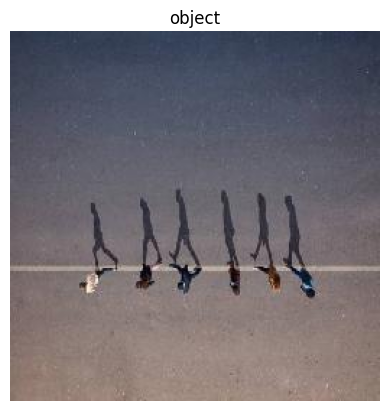

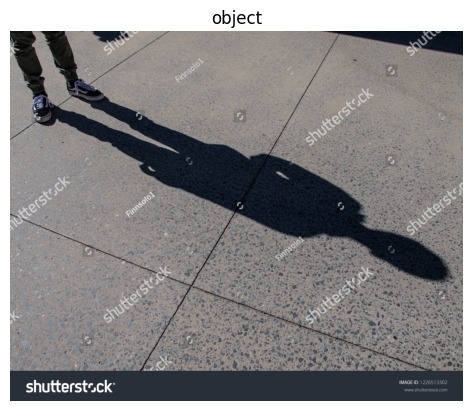

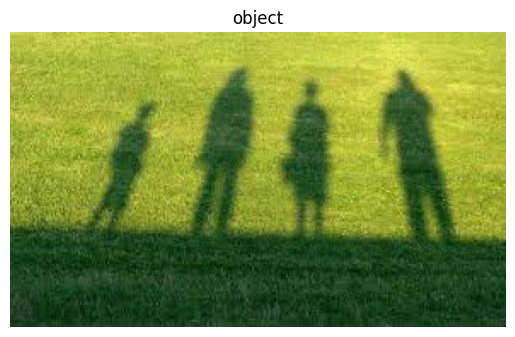

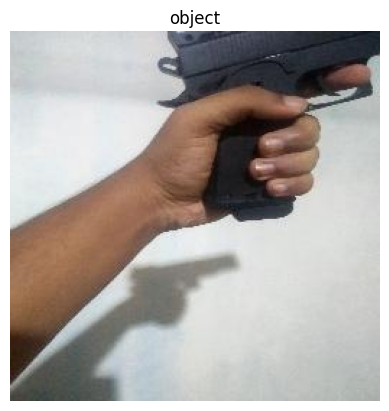

In [4]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
G = "/kaggle/input/s-d-3000/SD-3000/SD-3000/train/images"
for i in random.sample(os.listdir(G), 4):
    plt.imshow(mpimg.imread(os.path.join(G, i)), cmap='gray')
    plt.title("object")
    plt.axis('off')
    plt.show()

# Dataset Checking 

In [5]:
base_path = "/kaggle/input/s-d-3000/SD-3000/SD-3000"

for split in ["train", "val", "test"]:
    img_count = len(os.listdir(f"{base_path}/{split}/images"))
    lbl_count = len(os.listdir(f"{base_path}/{split}/labels"))
    print(f"{split.upper()}: Images = {img_count}, Labels = {lbl_count}")

# here we are checking the qauntity of images 
# in a dataset .


TRAIN: Images = 2100, Labels = 1929
VAL: Images = 451, Labels = 415
TEST: Images = 451, Labels = 429


# Making files of data.yaml 

In [6]:
%%writefile data.yaml
path: /kaggle/input/s-d-3000/SD-3000/SD-3000    # direct input folder

train: train/images
val: val/images
test: test/images

nc: 4
names: ['cow_shadow', 'dog_shadow', 'gun_shadow', 'human_shadow']

# here we are  making files of data.yaml 

Writing data.yaml


# checking new label file

In [7]:

!cat data.yaml

path: /kaggle/input/s-d-3000/SD-3000/SD-3000    # direct input folder

train: train/images
val: val/images
test: test/images

nc: 4
names: ['cow_shadow', 'dog_shadow', 'gun_shadow', 'human_shadow']

# here we are  making files of data.yaml 


# Loading Pretrained Model YOLO 

In [8]:
# Loading pretrained model 
model = YOLO("yolov8m.pt") 

# Ultralytics Training Block 

In [ ]:
model.train(
    data = "data.yaml", # assingning our label file to model
    epochs = 50,       # epochs 
    patience = 20,      # means if there is no improvement till 50 
    imgsz = 640,          # stop training   
    batch = 16,            
    augment = True,          # strong augmentation on
    close_mosaic = 10,       # last 10 epochs  clean training
    amp = True,              # faster training function 
    project = "/kaggle/working/runs",
    name = "shadow_detect_v3"
)


# data = "data.yaml" : 
#        master file of our dataset 
#        here yolo will get to know that 
#        where our images and their 
#        respective label are located . 



# patience = 20 :
              # assigning patience 20 , means if till 20 
              # epoch the validation are not improved 
              # then we model automatic do callback 
              # or early stopping


# augment = True : 
              #  Strong Augumentation assigned
              # automatic will do flip , rotate , scale 
              # brightness change .
        # will also reduce the risk ofoverfitting 
        # and will better perform in the real world


# close_mosaic = 10, 
         # The model sees four different objects or classes
         #   together in a single image and understands
         #  the differences between them more effectively.
         #  here 10 means it will do this 10 types 
         #  for better understandings


# amp = True,
           # function for faster training 


# project = "/kaggle/working/runs".
        # assigning path for our projects


#name = "shadow_detect_v2"
           # training version name 

# Loading Our Saved Best Model 

In [ ]:
# here we are loading our trained model
best_model = YOLO("/kaggle/working/runs/shadow_detect_v4/weights/best.pt") 


# Evaluation Matrics over Validation

In [ ]:
Pythonmetrics = best_model.val(  # default set for Yolo
    data="data.yaml",
    imgsz=640,
    batch=16,
    plots=True,            # confusion matrix, PR curves save honge
    save=True
)

print("Validation mAP50-95:", Pythonmetrics.box.map)
print("mAP50:", Pythonmetrics.box.map50)
print("Precision:", Pythonmetrics.box.p)
print("Recall:", Pythonmetrics.box.r)

# Evaluation Matrics over Test Set 

In [ ]:
test_metrics = best_model.val( # default set gain for yolo 
    data="data.yaml",
    split="test",  # best will predict over test set          
    imgsz=640,
    conf=0.7,              
    iou=0.6,
    plots=True,
    save=True
)



# print("Validation mAP50-95:", Pythonmetrics.box.map)
# print("mAP50:", Pythonmetrics.box.map50)
print("Precision:", Pythonmetrics.box.p)
print("Recall:", Pythonmetrics.box.r)
print("TEST mAP50-95:", test_metrics.box.map)
print("TEST mAP50:", test_metrics.box.map50)

# 

In [ ]:
results = best_model.predict(
    source="/kaggle/input/s-d-3000/SD-3000/SD-3000/test/images",
    conf=0.1,
    imgsz=640,
    save=True,  # prediction will save in  runs/detect/predict
    project="/kaggle/working/runs",
    name="test_predictions"
)



In [ ]:
!ls /kaggle/working/runs/shadow_detect_v2

In [ ]:
!ls /kaggle/working/runs/detect/test_predictions